In [3]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import yfinance as yf 
import math
import pandas_datareader as web
plt.style.use("bmh")

In [9]:
df = web.DataReader("NFLX", data_source="yahoo", start="2019-04-18", end="2020-04-18")

In [10]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-04-18,360.410004,351.640015,355.000000,360.350006,8353200,360.350006
2019-04-22,377.690002,359.000000,359.700012,377.339996,11980500,377.339996
2019-04-23,384.799988,374.709991,375.450012,381.890015,10089800,381.890015
2019-04-24,381.899994,373.269989,381.070007,374.230011,6541900,374.230011
2019-04-25,374.760010,365.700012,374.489990,368.329987,6255500,368.329987
...,...,...,...,...,...,...
2020-04-13,400.510010,367.700012,371.309998,396.720001,11692900,396.720001
2020-04-14,417.820007,394.850006,397.500000,413.549988,11581000,413.549988
2020-04-15,434.980011,412.250000,413.000000,426.750000,13561200,426.750000


In [11]:
df.shape

(252, 6)

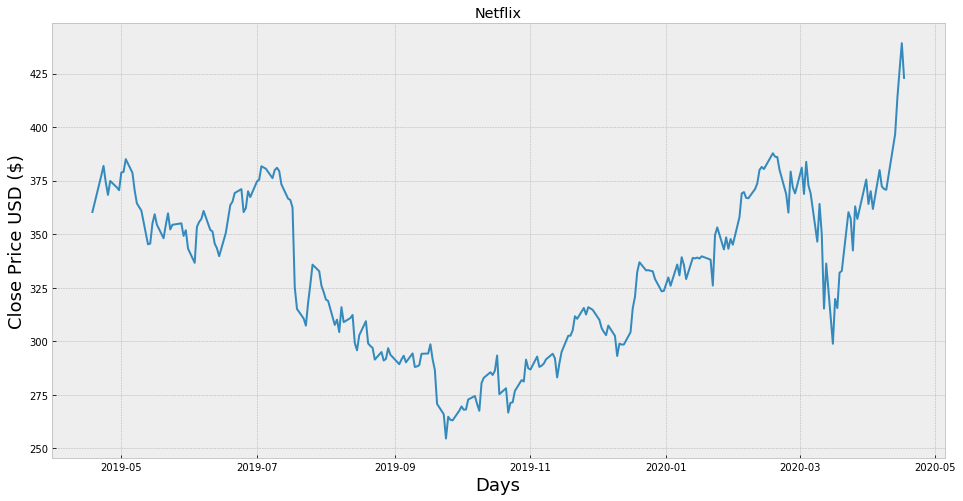

In [13]:
plt.figure(figsize = (16,8))
plt.title("Netflix")
plt.plot(df["Close"])
plt.xlabel("Days", fontsize = 18)
plt.ylabel("Close Price USD ($)", fontsize = 18)
plt.show()

In [15]:
#Just get the Close price
df = df[["Close"]]
df.head()

,Close
Date,
2019-04-18,360.350006
2019-04-22,377.339996
2019-04-23,381.890015
2019-04-24,374.230011
2019-04-25,368.329987


In [18]:
#Create a variable to predict "x" days into the future
future_days = 25
#Create a new column (target) shifted "x" units/days
df["Prediction"] = df[["Close"]].shift(-future_days)
df.tail(4)

<ipython-input-18-fda15a409658>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Prediction"] = df[["Close"]].shift(-future_days)


,Close,Prediction
Date,,
2020-04-14,413.549988,NaN
2020-04-15,426.750000,NaN
2020-04-16,439.170013,NaN
2020-04-17,422.959991,NaN


In [20]:
#Create a feature data set (X) and convert it to a numpy array and remove the last "x" rows/days
X = np.array(df.drop(["Prediction"], 1))[:-future_days]

In [22]:
#Create the target data set (y) and convert it into a numpy array adn get all the target values except the last x rows
y = np.array(df["Prediction"])[:-future_days]


In [23]:
#Let´s split the data 75% train and 25% testing 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

Let´s create the models

In [24]:
#Decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)
#Create linear regression model
lr = LinearRegression().fit(x_train, y_train)

In [26]:
#Get the last x_rows, from the future data set
x_future = df.drop(["Prediction"], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)

In [28]:
#Show the model tree prediction 
tree_prediction = tree.predict(x_future)
print(tree_prediction)

[336.29998779 298.83999634 319.75       302.79998779 357.11999512
 332.82998657 360.26998901 357.32000732 342.39001465 362.98999023
 357.11999512 370.95999146 375.5        360.86999512 370.07998657
 361.76000977 299.10998535 372.27999878 352.01000977 302.79998779
 396.72000122 413.54998779 426.75       439.17001343 422.95999146]


In [29]:
#Linear regression prediction 
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[353.81442415 353.70241733 356.3778025  358.00791093 361.94009277
 362.80491303 362.18273308 366.77442414 365.7851603  365.66694459
 361.97742205 354.90323906 349.54625983 361.46100206 356.7759878
 355.10855009 362.58714625 354.94677723 364.29193222 357.4417249
 355.07122081 341.08460872 352.05987214 343.21870037 321.64771317]


<ipython-input-31-67a0a80e3c9f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions


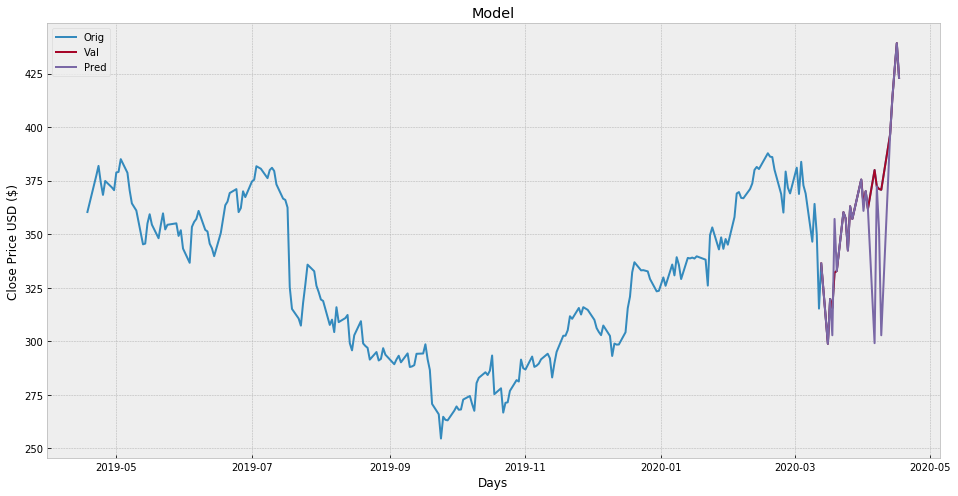

In [31]:
#Visualize the data
predictions = tree_prediction

valid = df[X.shape[0]:]
valid["Predictions"] = predictions
plt.figure(figsize = (16,8))
plt.title("Model")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(df["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Orig", "Val", "Pred"])
plt.show()

<ipython-input-32-0a24075af7af>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions


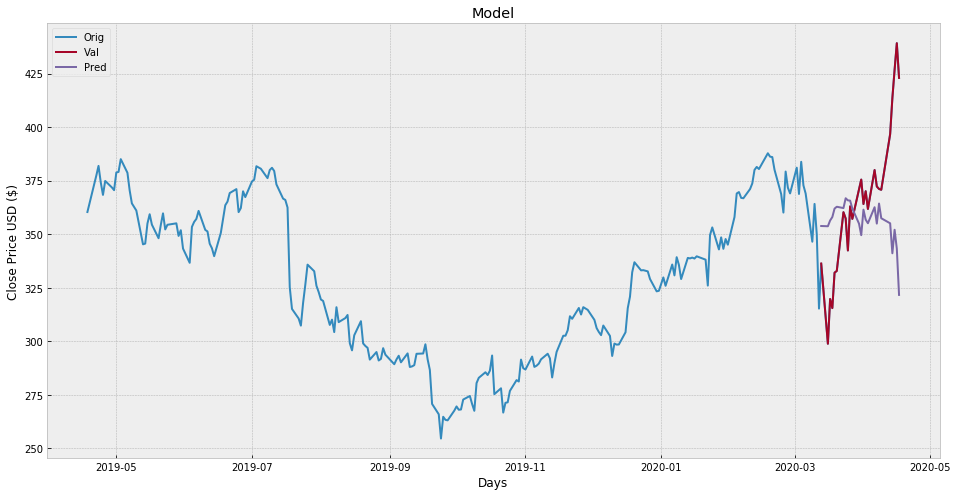

In [32]:
#Visualize the data
predictions = lr_prediction

valid = df[X.shape[0]:]
valid["Predictions"] = predictions
plt.figure(figsize = (16,8))
plt.title("Model")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(df["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Orig", "Val", "Pred"])
plt.show()